<a href="https://colab.research.google.com/github/GolovatyDmitry/Projects/blob/main/customer_churn_research%20(ML)/Customer_churn_research_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of contents<span class="tocSkip"></span></h1>

1. Project Description
2. Data Reading and Preparation
3. Exploratory Data Analysis
4. Customer Churn Prediction Model
5. Customer Segmentation
6. Conclusions and Recommendations

# Customer сhurn analysis in a fitness center

## Project description

Project objective: Conduct an analysis and develop an action plan to improve customer retention and reduce churn.

The initial data provided is processed information from customer profiles in CSV files.

## Data reading and preparation

In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.simplefilter('ignore')

Mounted at /content/drive


In [ ]:
# Reading the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [ ]:
# General information about the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

In [ ]:
# Converting column names to lowercase
df.columns = df.columns.str.lower()
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


**The data contains 4000 observations, 13 features, and 1 column with target values. The table has no missing values, duplicates, and all columns have the appropriate data types.**


## Exploratory data analysis

In [ ]:
# General information about the distribution of values in the table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [ ]:
# Number of retained and churned customers in the sample
df.groupby('churn')['gender'].count()

churn
0    2939
1    1061
Name: gender, dtype: int64

**The features `gender`, `near_location`, `partner`, `promo_friends`, `phone`, `group_visits`, as well as the target variable `churn`, are binary (having only 2 possible values).**

**It can be noted that the sample contains roughly an equal number of customers of different genders. However, there are almost three times more "retained" customers than "churned" customers in the sample.**

In [ ]:
# Average feature values for churn groups (target variable)
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<b> Based on the average feature values, we can highlight the following characteristics of "churned" customers:

- They live further away from the fitness center.
- They are less likely to be partners of the fitness center.
- They are less likely to come through a friend's referral.
- They have shorter membership durations (1.7 months compared to 5.7 months).
- They have less time remaining until the end of their membership (1.7 months compared to 5.3 months).
- They attend group classes less frequently.
- They spend less on additional fitness center services (115 USD compared to 158 USD).
- They have a shorter time since their first visit (1 month compared to 4.7 months).
- They have a slightly lower average frequency of visits per week (1.47 days compared to 2.02 days).
- In the last month before churn, their visit frequency decreases (down to 1.04 days). <b>

In [ ]:
#Tables of churned and retained customers
df_churn = df.query('churn == 1')
df_not_churn = df.query('churn == 0')

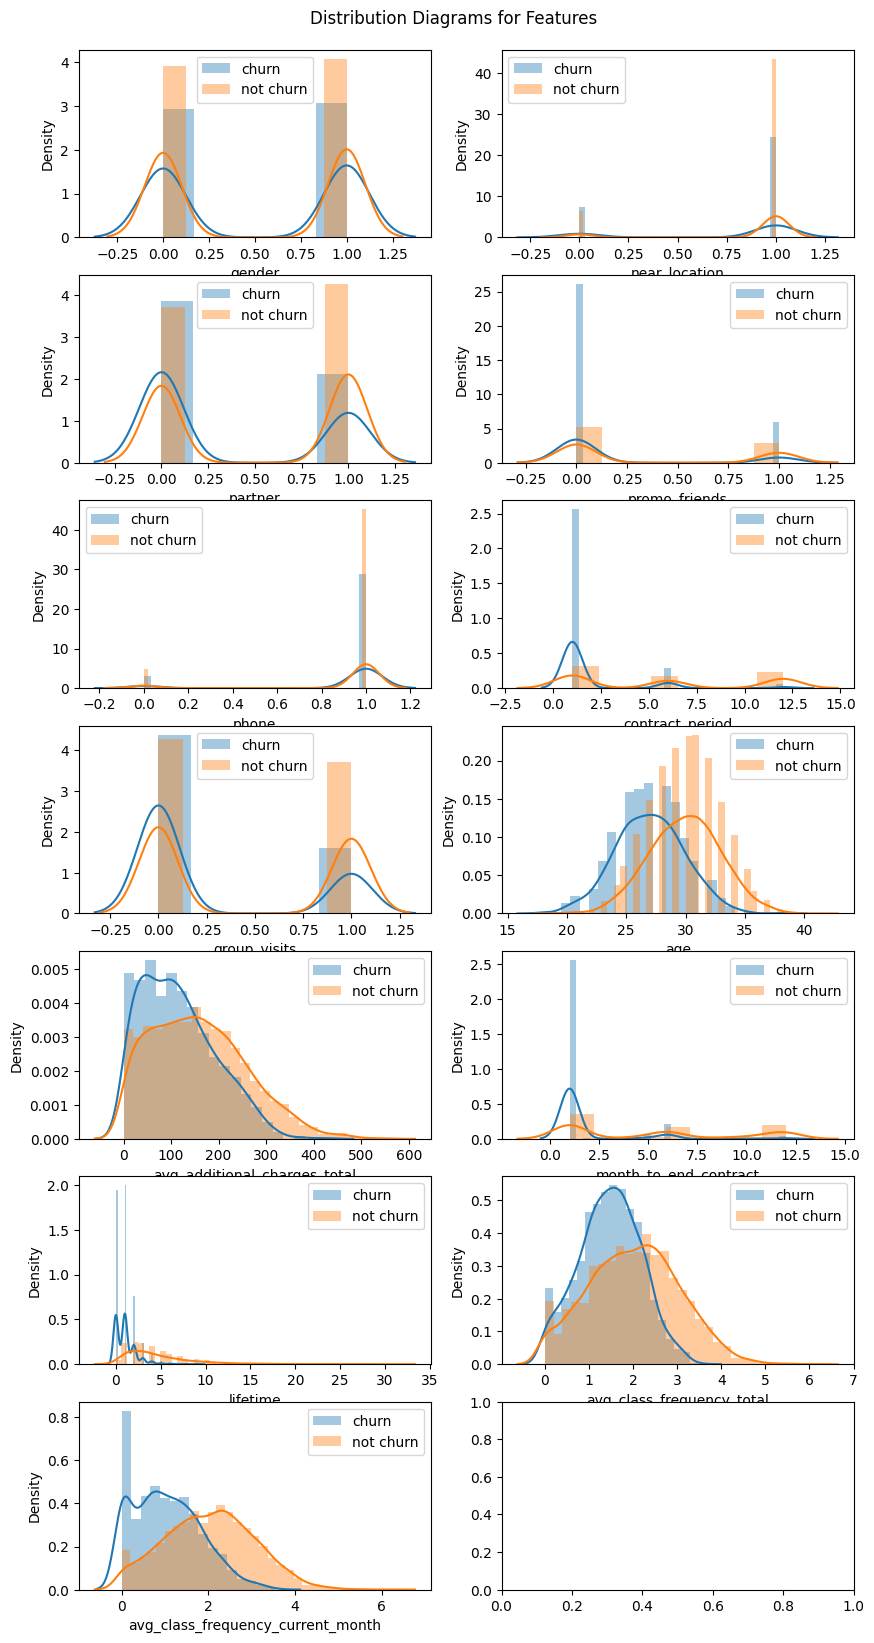

In [ ]:
# Creating a variable for the grid and feature names
grid =  [(i, j) for i in range(7) for j in range(2)]
data_plot_columns = df.drop(columns=['churn']).columns

# Creating histograms for the distribution of feature values for churned and retained customers
fig, ax = plt.subplots(7, 2, figsize=(10, 20))
for position, column in zip(grid, data_plot_columns):
    sns.distplot(df_churn[column], label='churn', ax=ax[position])
    sns.distplot(df_not_churn[column], label = 'not churn', ax=ax[position])
    ax[position].legend()
plt.suptitle('Distribution Diagrams for Features', y=0.9)
plt.show()

<b>The distribution diagrams confirm the previously mentioned findings. We can also observe almost perfectly normal distribution of `age` values. The distributions of other features are not as close to normal, but no significant outliers are detected. <b>

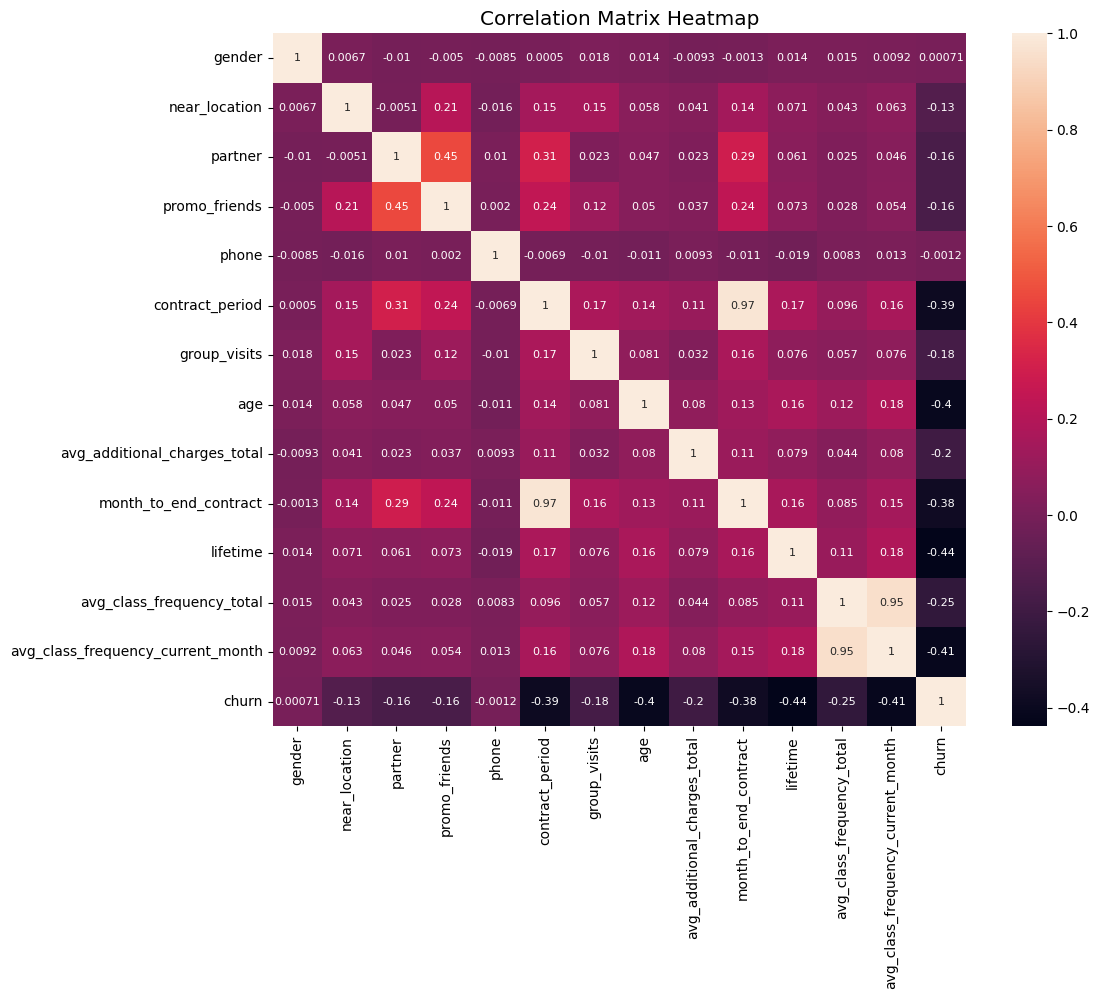

In [ ]:
#Constructing a correlation matrix
cm = df.corr()
fig, ax = plt.subplots(figsize=(12,9))
#Creating a heatmap with labels for the correlation matrix
sns.heatmap(cm, annot=True, square=True, annot_kws={"fontsize": 8})
plt.title('Correlation Matrix Heatmap', size='x-large')
plt.show()

<b>From the correlation matrix, we can observe a strong positive correlation between the features `contract_period` and `month_to_end_contract`, as well as between `avg_class_frequency_total` and `avg_class_frequency_current_month`. These features can be combined since they represent the same property.

There are no high correlations with the target variable. However, there is a moderate negative correlation between the features lifetime, `avg_class_frequency_current_month`, and `age`.


    
<br>Overall, the data quality allows us to build a model based on them. <br>   <b>

## Customer churn prediction model

<b> Since the target variable is a binary value, we will build a binary classification model. Specifically, we will apply logistic regression, random forest, and gradient boosting algorithms.

We will evaluate the models using metrics such as accuracy, precision, recall, F1 score, and ROC-AUC. <br>In the case of churn prediction, it is crucial to focus on correctly identifying the customers who stay, as missing potential churn and losing a customer would be more costly than working on retaining a customer. Therefore, emphasis should be placed on the recall metric. <br>Conversely, since the dataset is unbalanced in terms of target class distribution, accuracy is less important to us.<br><b>
    
We will split the dataset using random sampling, with a ratio of 80:20 for training and validation sets, as the observations are not dependent on a time series.

In [ ]:
# Splitting the data into features (matrix X) and target variable (y)
X = df.drop(columns=['churn'])
y = df['churn']

# Splitting the model into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Creating an instance of the StandardScaler class and applying it to the training set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  # Training the scaler and transforming the feature matrix for the training set

# Applying standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test)

In [ ]:
# List of models
models = [
    LogisticRegression(solver='liblinear', random_state = 0, C=10.0),
    RandomForestClassifier(n_estimators = 200, random_state = 0),
    GradientBoostingClassifier(n_estimators = 200, random_state = 0,  max_depth = 9),
]

In [ ]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    '''A function that takes a model and data as input and outputs metrics'''
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} F1:{:.2f} roc_auc_score:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            roc_auc_score(y_test, y_proba)
        )
    )

In [ ]:
# Loop that outputs metrics for each model
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')
Accuracy:0.94 Precision:0.90 Recall:0.86 F1:0.88 roc_auc_score:0.98 
RandomForestClassifier(n_estimators=200, random_state=0)
Accuracy:0.93 Precision:0.88 Recall:0.83 F1:0.86 roc_auc_score:0.97 
GradientBoostingClassifier(max_depth=9, n_estimators=200, random_state=0)
Accuracy:0.94 Precision:0.91 Recall:0.87 F1:0.89 roc_auc_score:0.98 


**The gradient boosting model performed better than the others based on the metrics. The recall metric is important to us, with a value of 86%. The F1 score (which balances recall and precision) is 88%, and the ROC-AUC score is 98%. The logistic regression model also has similar metrics. However, the gradient boosting model slightly outperforms it in terms of precision (91% compared to 90%).**

In [ ]:
# Training the final model
final_model = GradientBoostingClassifier(n_estimators = 350, random_state = 0,  max_depth = 8)
final_model.fit(X_train_st, y_train)
y_pred = final_model.predict(X_test_st)

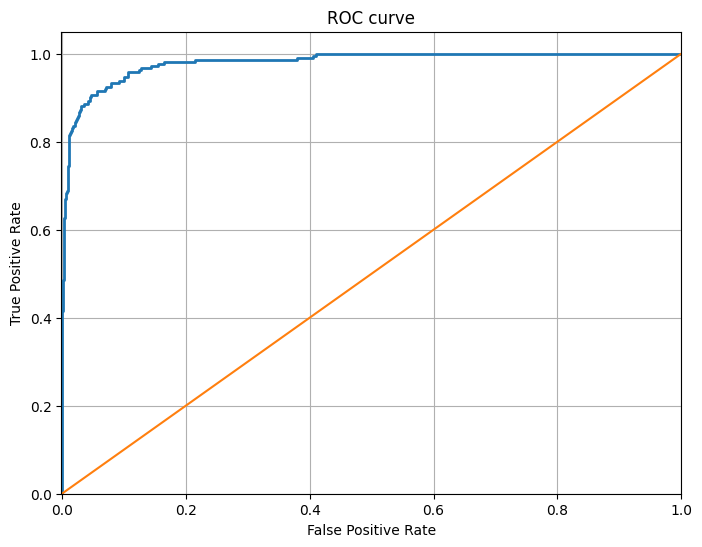

**roc_auc_score:0.98** 

In [ ]:
# Plotting the Receiver Operating Characteristic (ROC) curve for the final model

plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test_st)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([-0.001, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid()
plt.show()

Markdown('**roc_auc_score:{:.2f}** '.format(roc_auc_score(y_test, final_model.predict_proba(X_test_st)[:,1])))

In [ ]:
# Creating a dataframe with feature names and their importance, and displaying it in descending order of importance
feature_weights = final_model.feature_importances_
display(pd.DataFrame(feature_weights).sort_values(0, ascending=False).join(
        pd.DataFrame(X.columns), lsuffix='_weight', rsuffix='_feature'))

,0_weight,0_feature
10,0.357929,lifetime
12,0.182508,avg_class_frequency_current_month
11,0.180944,avg_class_frequency_total
9,0.095437,month_to_end_contract
7,0.076703,age
8,0.058195,avg_additional_charges_total
5,0.023480,contract_period
6,0.008436,group_visits
0,0.004766,gender
4,0.004374,phone


**The most influential factors on the target variable are the time since the first contact with the fitness center `lifetime`, as well as the average visit frequency in the current month `avg_class_frequency_current_month` and overall `avg_class_frequency_total`.**

## Customer clustering

In [ ]:
# Standardizing the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

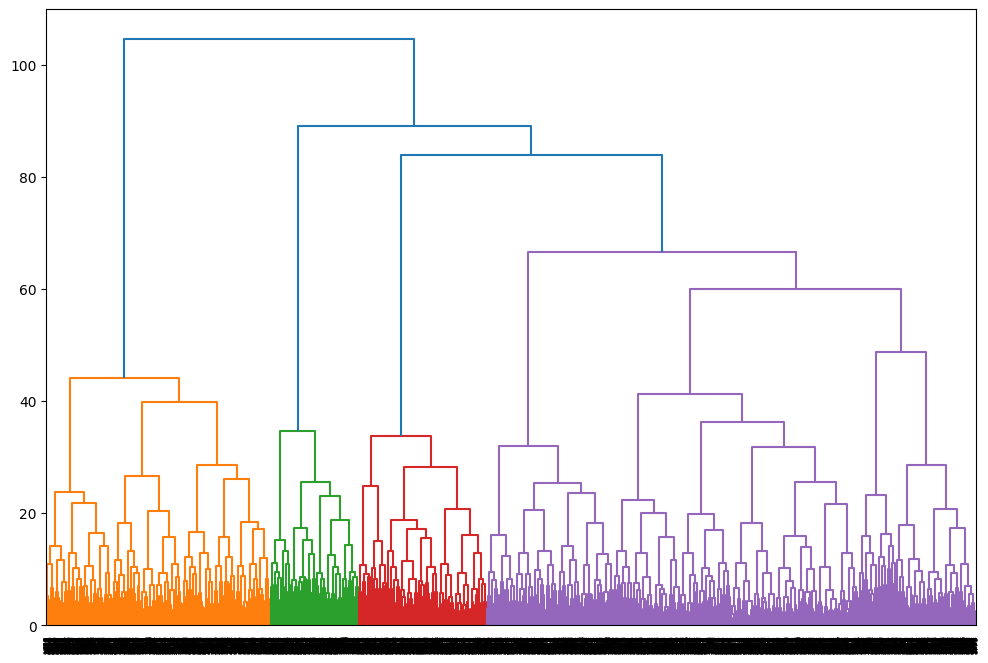

In [ ]:
# Creating a linkage matrix and plotting the dendrogram to identify the number of clusters
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top')
plt.show()

**Based on the dendrogram, we suggest identifying 5 clusters, as the last cluster is significantly larger.**

In [ ]:
# Defining the k-means model with 5 clusters
km = KMeans(n_clusters = 5, random_state=0)
# Predicting the clusters for the observations (assigning them numbers from 0 to 4)
labels = km.fit_predict(X_sc)

In [ ]:
# Saving the cluster labels in our dataset
X['cluster_km'] = labels
# Displaying the statistics for the average feature values per cluster
X_mean = X.groupby('cluster_km').mean().reset_index()
X_mean

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983
4,4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161


<b>Among the clusters identified by the K-means algorithm, we can highlight specific clusters for customers:

- Cluster 2: Customers who live outside the fitness center's area
- Cluster 1: Customers without a phone number
- Cluster 0: Customers with long-term active memberships and corresponding time until expiration (average of 10.9 months and 10 months, respectively) <b>

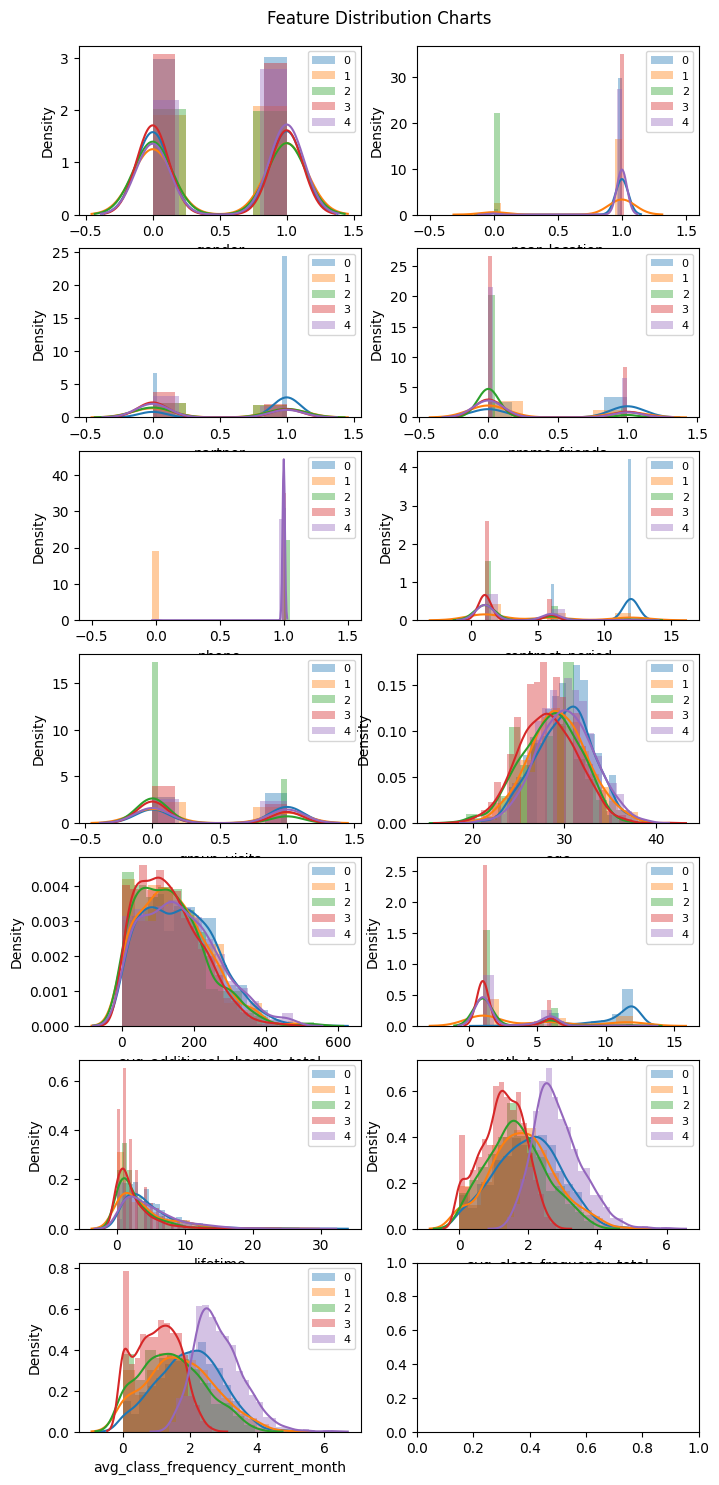

In [ ]:
# Plotting histograms of feature distributions for churned and retained customers
fig, ax = plt.subplots(7, 2, figsize=(8, 18))
for position, column in zip(grid, data_plot_columns):
    sns.distplot(X.query('cluster_km == 0')[column], label='0', ax=ax[position])
    sns.distplot(X.query('cluster_km == 1')[column], label = '1', ax=ax[position])
    sns.distplot(X.query('cluster_km == 2')[column], label = '2', ax=ax[position])
    sns.distplot(X.query('cluster_km == 3')[column], label = '3', ax=ax[position])
    sns.distplot(X.query('cluster_km == 4')[column], label = '4', ax=ax[position])
    ax[position].legend(fontsize=8)
plt.suptitle('Feature Distribution Charts', y=0.9)
plt.show()

In [ ]:
cluster_count = X.groupby('cluster_km')['gender'].count().reset_index().sort_values('gender', ascending=False).rename(columns={'gender':'count'})
cluster_count

,cluster_km,count
3,3,1262
0,0,1010
4,4,838
2,2,505
1,1,385


**After studying the feature distributions across clusters, we also observe that Cluster 0 has the highest percentage (78%) of partner customers, and it also has the highest number of customers who joined through the "bring a friend" promotion (57%).**

**Age and gender are evenly distributed across clusters.**

**The cluster sizes (number of customers in each cluster) vary. Cluster 3 is the largest with 1262 customers, while Cluster 1 is the smallest with 385 customers.**

In [ ]:
# Adding a column with clusters to the original table
df['cluster_km'] = labels
# Grouping by clusters and calculating the average churn rate
churn_cluster = df.groupby('cluster_km')['churn'].mean().round(2)
churn_cluster.sort_values(ascending=False)

cluster_km
3    0.51
2    0.44
1    0.27
4    0.07
0    0.03
Name: churn, dtype: float64

In [ ]:
# Creating a table with the count of customers with a specific contract period
df_contract_period_group = X.groupby(['cluster_km','contract_period'])['gender'].count().reset_index().rename(columns={'gender':'count'})
# Calculating the proportion of customers with a specific contract period in their cluster
df_contract_period_group = df_contract_period_group.merge(cluster_count, on='cluster_km').rename(columns={'count_x':'count', 'count_y':'sum'})
df_contract_period_group['part'] = (df_contract_period_group['count'] / df_contract_period_group['sum']).round(2)
df_contract_period_group

,cluster_km,contract_period,count,sum,part
0,0,6,187,1010,0.19
1,0,12,823,1010,0.81
2,1,1,205,385,0.53
3,1,6,87,385,0.23
4,1,12,93,385,0.24
5,2,1,390,505,0.77
6,2,6,97,505,0.19
7,2,12,18,505,0.04
8,3,1,1031,1262,0.82
9,3,6,224,1262,0.18


In [ ]:
# Average feature values per cluster
X_mean

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983
4,4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161


<b> Clusters 3 and 2 are the most prone to churn, with churn rates of 51% and 44% respectively.  <br>Interestingly, these groups exhibit polar values in terms of proximity to the fitness center: customers in cluster 3 are located near the fitness center, while customers in cluster 2 are outside the area. Therefore, it can be concluded that this factor does not have a significant impact on churn.

<br>These clusters can be characterized as follows:

- Low values for the duration of the active membership and the remaining time until expiration (mostly opt for a monthly membership).
- Lowest proportion of group class attendance (rarely participate in group classes).
- Low expenditure on additional fitness center services (rarely utilize additional services, averaging up to 140 USD).
- Low values of lifetime (relatively recent members, within 3 months).
- Low values of visit frequency to the fitness center, with a decrease in the last month (average of 1-2 visits per week and a slight decline in the last month).    <br> <b>

<b>On the other hand, customers from clusters 0 and 4 are the most reliable, with churn rates of 3% and 7% respectively.

Key characteristics of these clusters include:

- Highest proportion of group class attendance (around 50% of the group members participate in group classes).
- High expenditure on additional fitness center services (averaging around 160 USD).
- High values of lifetime (members attend the center for an average of 5 months).
- High visit frequency to the fitness center, with consistent values in the last month (average of 2-3 visits per week and no decline in the last month).

Cluster 0 is characterized by a high proportion of long-term memberships (mostly opting for annual memberships). Cluster 4, although not having such long memberships, has a higher proportion of customers opting for 6-month memberships compared to the churn-prone clusters.</b>

## Conclusions and Recommendations:

The main factors influencing churn can be identified as follows:

<b>1. Time since the first visit (lifetime) up to 3 months.
<br><br> 2. Low visit frequency and a decrease in frequency in the last month.
<br><br> 3. Low expenditure on additional fitness center services.
<br><br></b>

Based on this, the following recommendations can be made:

<b>1. Pay more attention to customers who have been attending the fitness center for less than 3 months. </b>
<br><br>For example, promote longer memberships to provide customers with financial motivation to continue their fitness journey. In our dataset, there are no 3-month memberships available. However, offering a 3-month membership option might make it easier for customers to decide compared to a 6-month membership, while still allowing them to form a habit of regular visits within 3 months.
<br><br>
<b>2. Encourage more frequent visits to the fitness center and take additional measures when visit frequency decreases.</b>
<br><br>For example, send reminders and motivational messages via messaging platforms or provide additional incentives for those who visit on weekdays, not just weekends. It may also be beneficial to offer a discount on future memberships when visit frequency decreases.
<br><br>
<b>3. Encourage customers to spend more on additional fitness center services.</b>
<br><br>For instance, offer energizing post-workout cocktails or actively promote the benefits of massage and cosmetic procedures in helping customers achieve their fitness goals (weight loss, overall health, injury prevention).<br>